In [64]:
## ECE 397 - Individual Study in ECE Problems
## Professor: Thomas Moon
## Student: Jihyun Seo

## This program uses a python to test transmit and receive datas encoded in PPM (Pulse Positioning Modulation)
## The Bits are converted into PPM modulated Symbols, and will be transmitted through channel.
## Processing through essential wireless communication stages.

## Objective:
## The goal is to successfully transmit bits using PPM modulation, 
## by performing these core wireless communication functions.

In [65]:
import numpy as np
import matplotlib.pyplot as plt 
import adi
from scipy import signal


In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 2e6  # Sampling rate (1 MHz) → 1 sample per μs
chip_duration = 0.5e-6  # 0.5 μs per chip
samples_per_chip = max(1,int(fs * chip_duration))  # 1 sample per chip




# Step 1: Define the preamble (in chips) → 8us duration
preamble_chips = np.array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])






# Step 2: Generate a random 100-bit sequence
num_bits = 100
bit_sequence = np.random.randint(0, 2, num_bits)







# Step 3: Convert bits to chips (1 → [1, 0], 0 → [0, 1])
def bits_to_chips(bits):
    chips = np.zeros(len(bits) * 2, dtype=int)
    for i, bit in enumerate(bits):
        if bit == 1:
            chips[i * 2: i * 2 + 2] = [1, 0]  # 1 → [10]
        else:
            chips[i * 2: i * 2 + 2] = [0, 1]  # 0 → [01]
    return chips


chip_sequence = bits_to_chips(bit_sequence)








# Step 4: Concatenate preamble and chip sequence
tx_signal_chips = np.concatenate([preamble_chips, chip_sequence])



In [67]:
print("Chip_sequence: ",chip_sequence)
print(len(chip_sequence))

print(bit_sequence)


Chip_sequence:  [0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1]
200
[0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0]


In [68]:
print("Length of the tx_signal_chips including preamble and data : " ,len(tx_signal_chips))


Length of the tx_signal_chips including preamble and data :  216


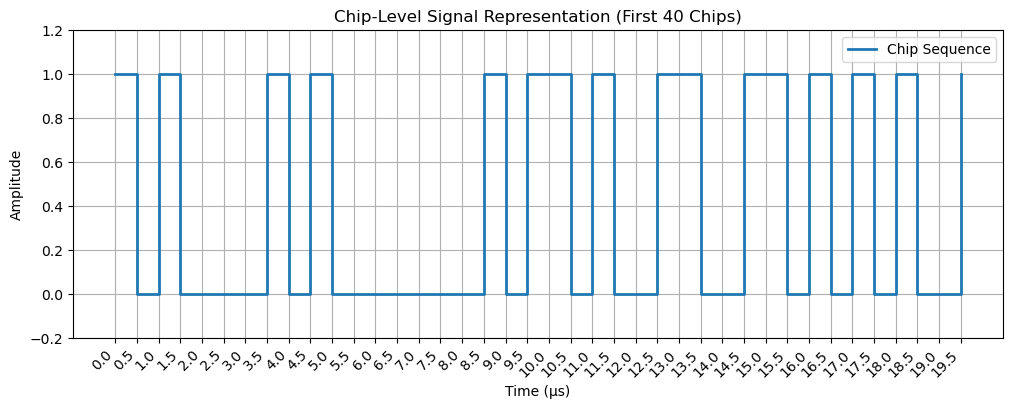

In [69]:
# Plot the chip sequence with microseconds as the x-axis using 'post' step position
plt.figure(figsize=(12, 4))
plt.step(time_axis_us[:40], tx_signal_chips[:40], where='post', label="Chip Sequence", linewidth=2)

# Set x-axis ticks every 0.5 µs
max_time = time_axis_us[:40][-1]  # Maximum time value in the first 40 chips
plt.xticks(np.arange(0, max_time + 0.5, 0.5))  # Add 0.5 to include the last tick

plt.title("Chip-Level Signal Representation (First 40 Chips)")
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid()

# Optional: Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.show()

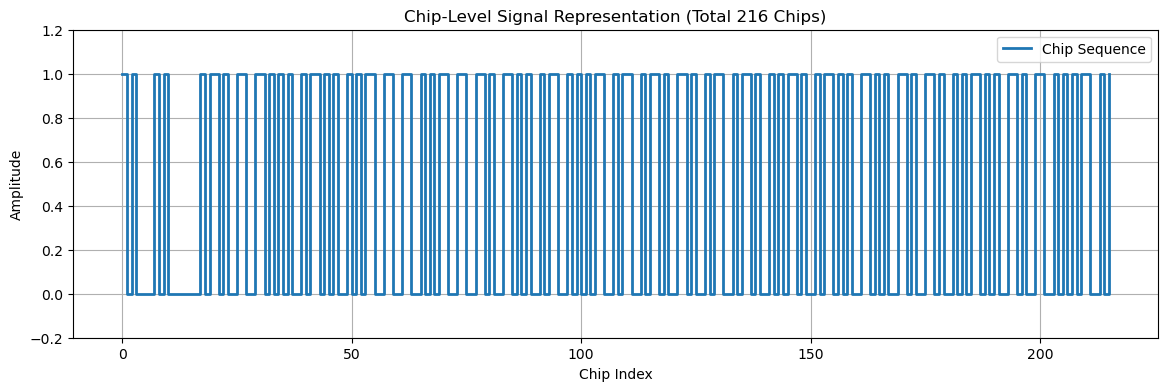

In [70]:
# Plot the full chip sequence
plt.figure(figsize=(14, 4))
plt.step(time_axis, tx_signal_chips, where='post', label="Chip Sequence", linewidth=2)
plt.title(f"Chip-Level Signal Representation (Total {len(tx_signal_chips)} Chips)")
plt.xlabel("Chip Index")
plt.ylabel("Amplitude")
plt.ylim(-0.2, 1.2)  # Keep values in [0,1] range for clarity
plt.legend()
plt.grid()
plt.show()

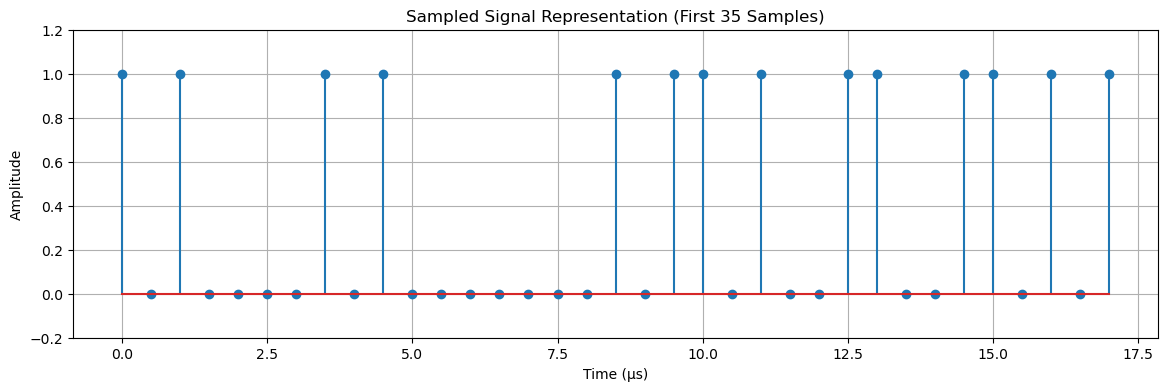

First few samples of rx_signal_chips: [0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1]
length of the rx_data_signal:  200


In [71]:

# Step 5: Sample **only once per chip duration**
rx_signal_chips = tx_signal_chips[::1]  # Taking only one sample per chip

# Generate new time axis for sampled signal (in µs)
time_axis_sampled = np.arange(len(rx_signal_chips)) * (0.5)  # 0.5 µs per chip

# Plot the sampled signal (Fixed Version)
plt.figure(figsize=(14, 4))
plt.stem(time_axis_sampled[:35], rx_signal_chips[:35])  # One sample per chip
plt.title("Sampled Signal Representation (First 35 Samples)")
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.ylim(-0.2, 1.2)  # Keep values in [0,1] range for clarity
plt.grid()
plt.show()

# Print the first 35 sampled values for verification
rx_data_signal = rx_signal_chips[16:]
print("First few samples of rx_signal_chips:", rx_data_signal)
print("length of the rx_data_signal: " ,len(rx_data_signal) )

In [72]:
def chips_to_bits_fixed(chip_sequence):
    """Decode a chip sequence back into bit sequence based on PPM encoding.
    - Each bit consists of two chips (0.5 µs each).
    - Falling transition (1 -> 0) → Bit 1
    - Rising transition (0 -> 1) → Bit 0
    - Ignore invalid chip patterns
    """
    bits = []
    for i in range(0, len(chip_sequence) - 1, 2):  # Process every 2 chips
        chip_pair = chip_sequence[i:i+2]

        if np.array_equal(chip_pair, [1, 0]):  # Falling transition → Bit 1
            bits.append(1)
        elif np.array_equal(chip_pair, [0, 1]):  # Rising transition → Bit 0
            bits.append(0)
        else:
            # Skip invalid chip patterns (e.g., [0, 0] or [1, 1])
            continue  

    return np.array(bits)





# Demodulate chips back to bits (fixed version)
demodulated_bits_fixed = chips_to_bits_fixed(rx_data_signal)




# Display demodulated bit sequence
print(demodulated_bits_fixed)
print(len(demodulated_bits_fixed))


[0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0]
100


In [73]:
def calculate_ber(demodulated_bits_fixed, bits):
    """
    Calculate the Bit Error Rate (BER) between two binary sequences.
    
    Parameters:
    demodulated_bits_fixed (list or numpy array): Received/demodulated bit sequence.
    bits (list or numpy array): Original transmitted bit sequence.
    
    Returns:
    float: The bit error rate (BER).
    """
    # Ensure the input sequences have the same length
    if len(demodulated_bits_fixed) != len(bits):
        raise ValueError("Input sequences must have the same length.")
    
    # Compute the number of bit errors
    bit_errors = sum(b1 != b2 for b1, b2 in zip(demodulated_bits_fixed, bits))
    
    # Compute BER
    ber = bit_errors / len(bits)
    
    return ber



ber = calculate_ber(demodulated_bits_fixed, bit_sequence)
print(f"Bit Error Rate (BER): {ber:.6f}")


Bit Error Rate (BER): 0.000000
